In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import env
import dataprep

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

from sklearn.model_selection import train_test_split
import sklearn.linear_model
import sklearn.feature_selection
import sklearn.preprocessing
from scipy import stats
from sklearn.feature_selection import SelectKBest, RFE, f_regression, SequentialFeatureSelector

In [8]:
df = dataprep.get_zillow_data()

Using cached csv


In [9]:
df = dataprep.wrangle_zillow()

In [10]:
df.head(2)

,parcelid,bathrooms,bedrooms,area,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,regionidcity,...,roomcnt,year_built,structuretaxvaluedollarcnt,tax_value,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,53571.0,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,13091.0,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Ventura


In [42]:
df.latitude

0        33634931.0
1        34449266.0
2        33886168.0
3        34245180.0
4        34185120.0
            ...    
77569    34202400.0
77570    34245368.0
77571    34300140.0
77572    34040895.0
77573    33937685.0
Name: latitude, Length: 69729, dtype: float64

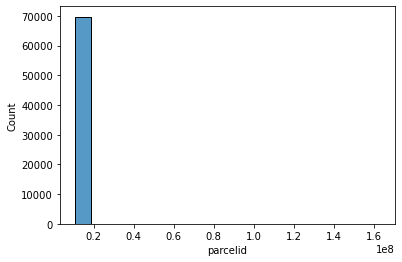

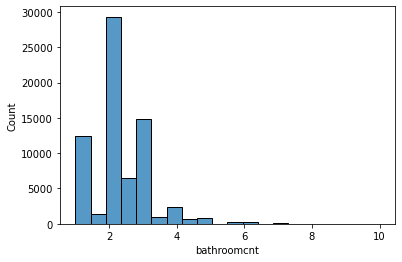

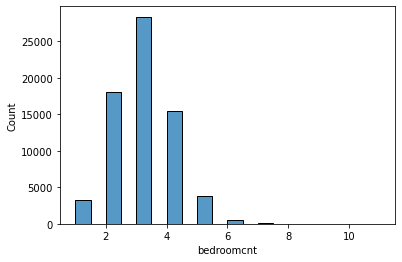

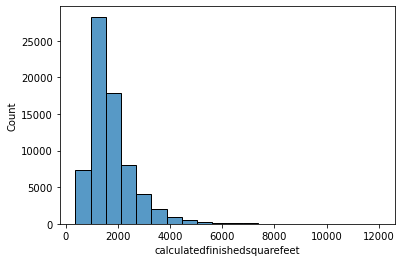

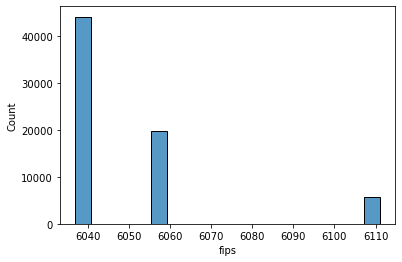

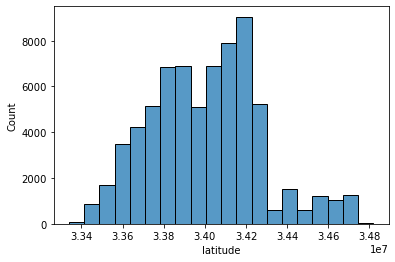

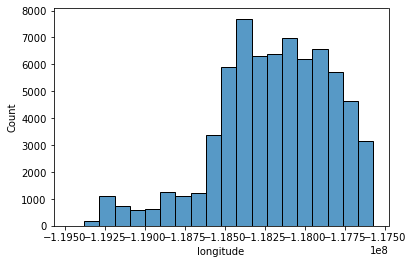

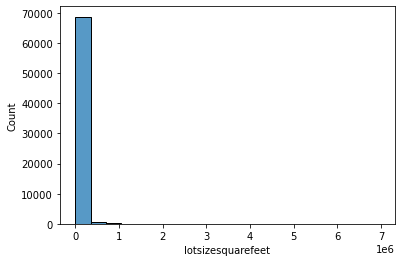

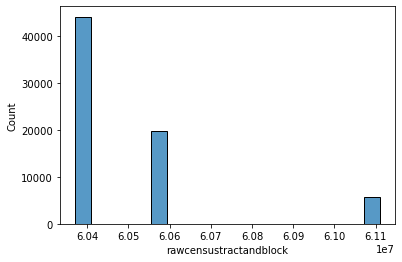

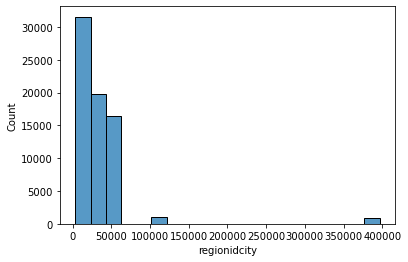

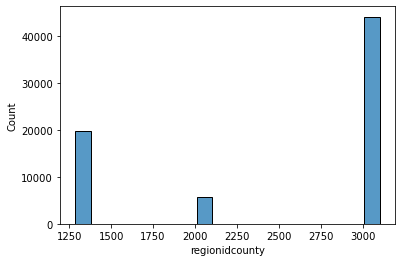

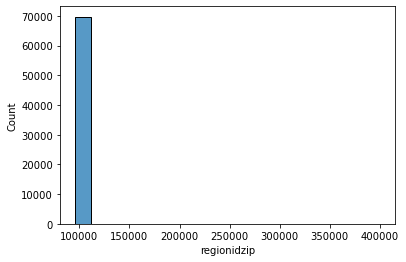

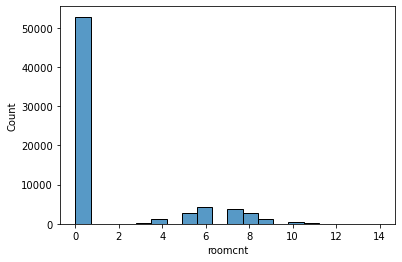

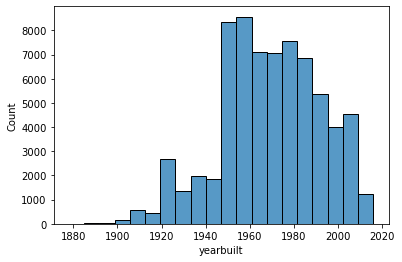

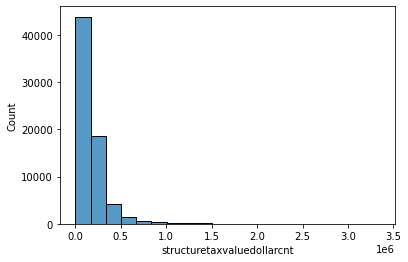

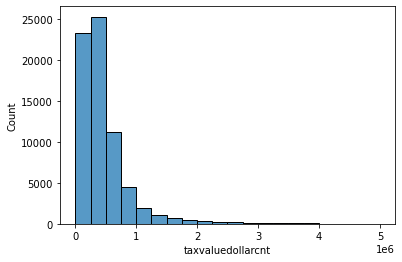

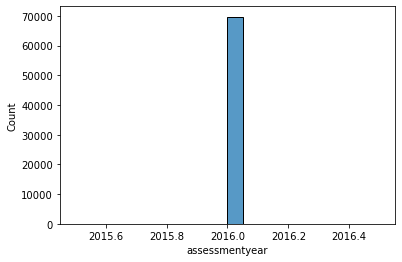

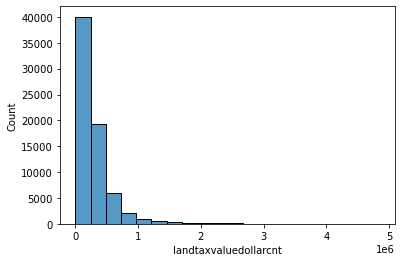

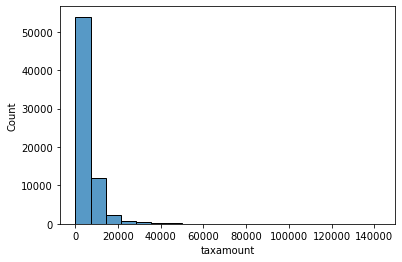

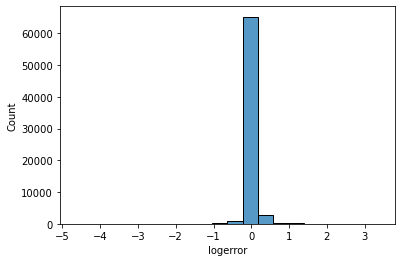

In [96]:
quantitative_columns = [col for col in df.columns if df[col].dtype != 'object']

# for each of those columns:
for col in quantitative_columns:

        # display a histogram of that column's distribution
        sns.histplot(df[col], bins =20)
        plt.show()
    

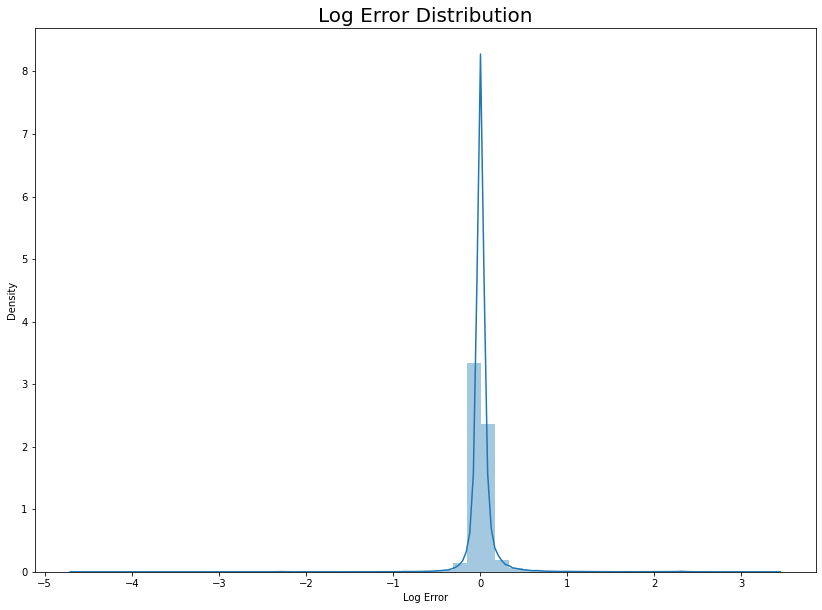

In [8]:
# overall logerror distribution 
plt.figure(figsize=(14, 10))
sns.distplot(df.logerror)
plt.title('Log Error Distribution', fontsize=20)
plt.xlabel('Log Error')

plt.show()

In [11]:
train, validate,test = dataprep.removed_outliers(df)

In [7]:
print(train.shape)
print(validate.shape)
print(test.shape)

(36482, 22)
(15636, 22)
(13030, 22)


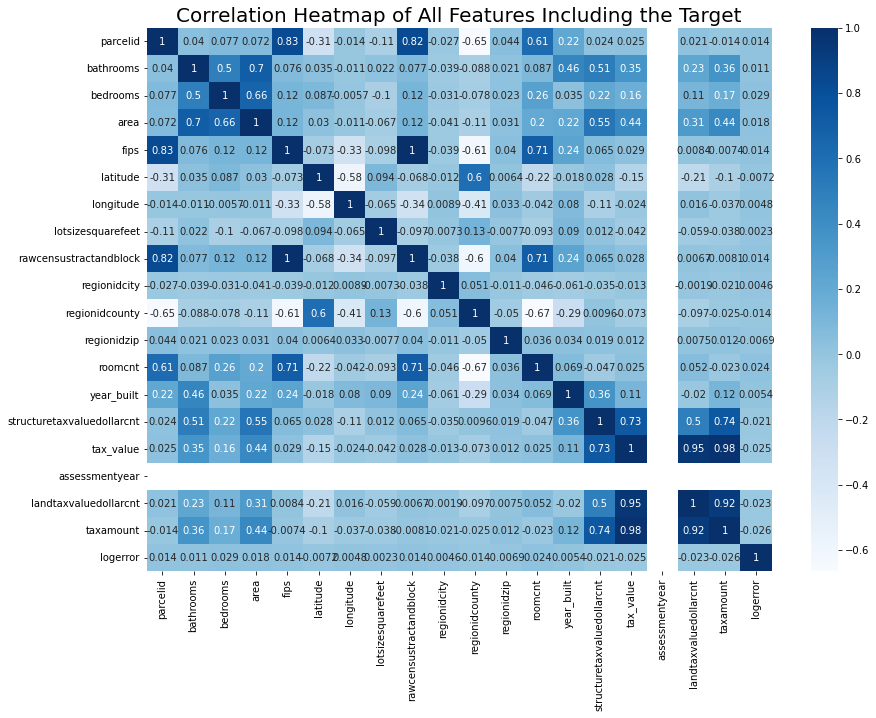

In [23]:
# Heatmap to display correlation of the features and logerror.
plt.figure(figsize=(14, 10))
sns.heatmap(train.corr(), cmap='Blues', annot=True)
plt.title('Correlation Heatmap of All Features Including the Target', fontsize=20)
plt.show()

In [12]:
alpha = 0.5

## Question 1.
## Is logerror significantly different for properties in LA County vs Orange County?

In [ ]:
#H0: There is no difference in logerror between LA county vs Orange county. 
#H1: There is difference in logerror between LA county vs Orange county. 

In [8]:
train.county.value_counts()

Los_Angeles    23422
Orange         10145
Ventura         2915
Name: county, dtype: int64

<AxesSubplot:xlabel='county', ylabel='logerror'>

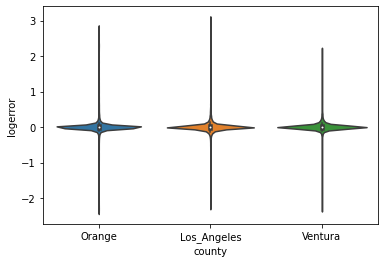

In [9]:
sns.violinplot(x="county", y="logerror", data=train)

In [10]:
la_county = train[(train.county == "Los_Angeles")].logerror
orange_county = train[(train.county == 'Orange')].logerror 
ventura = train[(train.county == 'Ventura')].logerror

In [13]:
# Perform a t test becuase we are comparsing two means,
# This is a two-sampled, two-tailed test. 
t, p = stats.ttest_ind(la_county,orange_county, equal_var=False )
print(t, p)

if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

-2.248155594523161 0.02457976166972376
We reject the null hypothesis


## Question 2.
## Do year_built related with logerror? 

In [ ]:
#H0:There is no relationship between logerror and year_built.
#H1: There is relationship between logerror and year_built. 

AttributeError: 'Text' object has no property 'frontsize'

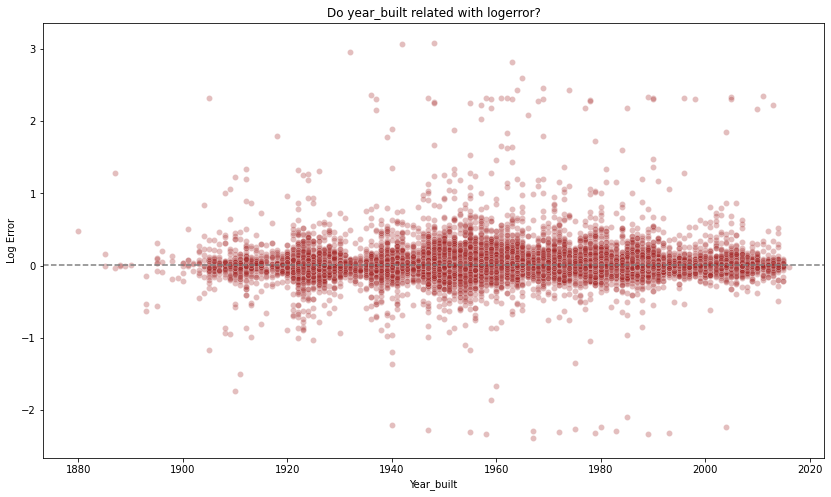

In [13]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='year_built', y='logerror', data=train,alpha=.3, color ='brown')

mean1 = train.logerror.mean()
plt.axhline(mean1, ls='--', color='grey')

plt.xlabel('Year_built')
plt.ylabel('Log Error')
plt.set_title('Do year_built related with logerror?',frontsize = 15)
plt.show()

In [16]:
corr, p = stats.pearsonr(train.logerror, train.year_built)
print(corr, p)
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

0.005400631496055583 0.3023031599335249
We reject the null hypothesis


## Question 3.
## Does the area of homes impact on logerror?

In [62]:
#H0:There is no relationship between logerror and area.
#H1: There is relationship between logerror and area. 

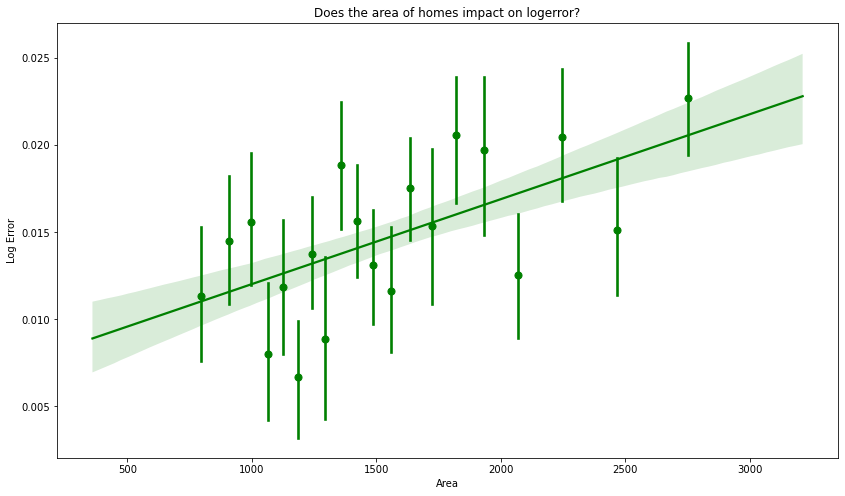

In [61]:
plt.figure(figsize=(14,8))
sns.regplot(x=train.area, y=train.logerror, x_bins=20,ci=70, truncate=True,x_estimator=np.mean, color = 'g')
plt.xlabel('Area')
plt.ylabel('Log Error')
plt.title('Does the area of homes impact on logerror?')
plt.show()

#CI: Size of the confidence interval for the regression estimate.

In [63]:
corr, p = stats.pearsonr(train.logerror, train.area)
print(corr, p)
if p < alpha:
    print("We reject the null hypothesis")

else:
    print("We fail to reject the null hypothesis")

0.018230903523404944 0.0004970886068872772
We reject the null hypothesis


In [ ]:
## Question 4


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [16]:
train.columns

Index(['parcelid', 'bathrooms', 'bedrooms', 'area', 'fips', 'latitude',
       'longitude', 'lotsizesquarefeet', 'rawcensustractandblock',
       'regionidcity', 'regionidcounty', 'regionidzip', 'roomcnt',
       'year_built', 'structuretaxvaluedollarcnt', 'tax_value',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'logerror',
       'transactiondate', 'county'],
      dtype='object')

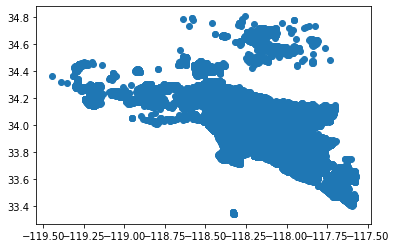

In [58]:
plt.scatter(lon, lat)

In [56]:
# Extract the data we're interested in
lat = train.latitude.values/1000000
lon = train.longitude.values/1000000

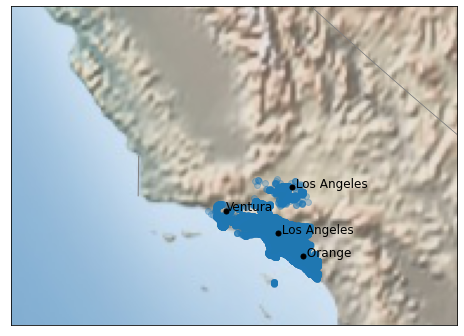

In [108]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='gnom', resolution='c', 
            lat_0=35, lon_0=-119,
            width=0.7E6, height=0.5E6)


m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')
m.scatter(lon, lat, latlon=True,
          
          cmap='Reds', alpha=0.3)


x, y = m(-118.2437, 34.0522)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Los Angeles', fontsize=12);


x2, y2 = m(-117.8311, 33.7175)
plt.plot(x2, y2, 'ok', markersize=5)
plt.text(x2, y2, ' Orange', fontsize=12);



x3, y3 = m(-119.1391, 34.3705)
plt.plot(x3, y3, 'ok', markersize=5)
plt.text(x3, y3, 'Ventura', fontsize=12);


x4, y4 = m(-118, 34.7)
plt.plot(x4, y4, 'ok', markersize=5)
plt.text(x4, y4, ' Los Angeles', fontsize=12);



# m.drawcoastlines()
# # draw a boundary around the map, fill the background.
# # this background will end up being the ocean color, since
# # the continents will be drawn on top.
# m.drawmapboundary(fill_color='aqua')
# # fill continents, set lake color same as ocean color.
# m.fillcontinents(color='white',lake_color='aqua')
